#### Lecture 5 : Data manipulation in Python

*November, 2021 - François HU*

*Master of Science - EPITA*

*This lecture is available here: https://curiousml.github.io/*

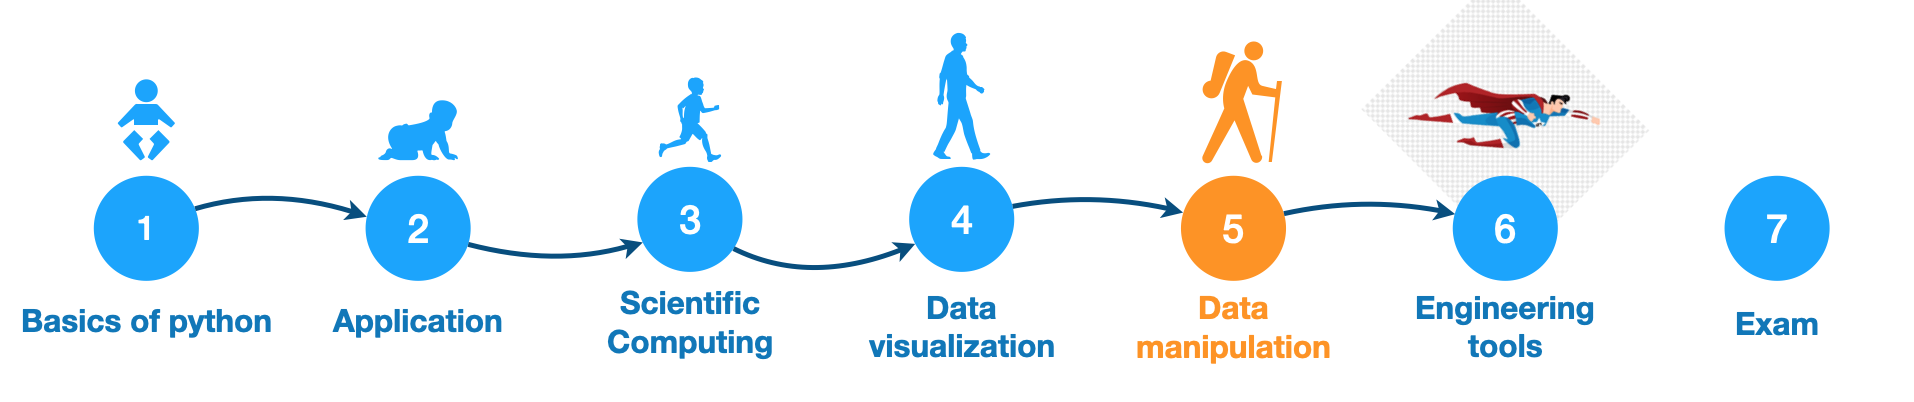

[General introduction](#I)

1. [Introduction to DataFrames](#1)
2. [Data representation](#2)
3. [Data manipulation](#3)
3. [Descriptive statistics with Pandas](#4)
4. [Data visualization with Pandas](#5)

[Exercices](#E)

# General introduction (a little long) <a name="I"></a>

Data can be represented in various forms: [txt](https://en.wikipedia.org/wiki/Text_file), [csv](https://en.wikipedia.org/wiki/Comma-separated_values), [xls](https://en.wikipedia.org/wiki/Microsoft_Excel#File_formats) (excel), [json](https://en.wikipedia.org/wiki/JSON), ... . In python, given a specific extension (.txt for example), we have many adequate modules for importing data. For "classical" files such as txt files, Python has some useful built-in commands for importing and handling them: we can open for example a txt file as **write** or **read** mode with the command `open`.

### Write and add mode

The information is always written in the form of strings and always added at the end of the file, which grows until all the information is written. The writing is always done according to the following same scheme.

1. **creation or opening of the file**: when the file is opened, the file in which the information will be written is created if it does not exist or cleaned up if it already exists;
2. **writing** thanks to the **method `write`** of `f` (`TextIOWrapper` object);
3. **closing**: closing allows other programs to read what you have placed in this file.

In [6]:
# if we want to write in a .txt file in Python

# "w" is for write mode, we import the file "file_name.txt" as f and after the "with" block, the program close automatically
with open ("file_name.txt", "w") as f:    
    f.write("writing whatever I want in this file...")
    f.write("and adding another information. ")
    f.write("Let us skip two lines: \n\n")
    f.write("Let us add tabulates: \t\t")
    f.write("End.\n")

In [7]:
# "a" is for add mode, in the same file "file_name.txt", let us add more informations
with open ("file_name.txt", "a") as f:    
    f.write("\nAdding an information without erasing the previous informations")

### read mode

The reading of a file allows to find the stored information. It takes place according to the same principle, namely :

1. **opening** the file in read mode;

2. **reading** directly **iterating over** the file object or using the **`readlines` method**;

3. **closing**.

However, there is a difference when reading a file: it is done line by line, whereas writing does not necessarily follow a line-by-line division.

In [8]:
# if we want to read in a .txt file in Python

with open ("file_name.txt", "r") as f:
    for ligne in f:
        print(ligne)

writing whatever I want in this file...and adding another information. Let us skip two lines: 



Let us add tabulates: 		End.



Adding an information without erasing the previous informations


**Remark:** the `with` command handles the opening and the closing processes. Alternatively (although not recommended) we can write (for write mode):
```
f = open ("file_name.txt", "w") # opening
...                             # writing
...                             # writing
f.close ()                      # closing
```

### external packages

With the above Python built-in processes, importing and manipulating more "complex" types of data becomes too hard. For instance, let us import a `csv` file with the above method and store the values in a list. You can download the `iris` dataset [here](https://curiousml.github.io/teaching/epita-python/Iris.csv). Iris dataset is one of the best known toy database in the pattern recognition literature. The dataset contains 3 classes (of 50 instances each):
- `"Iris-setosa"`;
- `"Iris-versicolor"`;
- and `"Iris-virginica"`

Each class refers to a type of iris plant.

In [9]:
table = []
with open ("data/iris.csv", "r") as f:
    table = f.readlines()
    ##equivalently you can write ...
    #for lines in f: 
    #   table.append(lines)

table[:5] # let's look at the first 5 rows

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris.csv'

As you can see, each line represent a string leading us to handle string objects instead of the wanted values. **In this case** it is recommended to use external packages.

## 1. Introduction to Dataframes <a name="1"></a>


This lecture explore how to represent and manipulate data and more preciselly [datasets](https://en.wikipedia.org/wiki/Data_set). Simply put, a dataset is just a collection of data often represented by **tables** where:
- each **column** of a table represents a variable (e.g. height, weight, age, grade, ...)
- and each **row** of a table represents an observation (just one case) of a variable.

The most well-known package in Python for handling efficiently data as a two-dimensional table is [pandas](https://pandas.pydata.org/) which provides a container for tables, called *Dataframe*.

The main features of Pandas and its dataframe are:
- reading data from csv and Excel files;
- giving names to variables and index to observations;
- providing methods for visualization and descriptive statistics.

Like always, in a terminal (e.g. anaconda prompt), you can install the package `pandas` with the command:
```
pip install pandas
```
We note that pandas is frequently renamed as `pd`.

In [ ]:
import pandas as pd

Below you will find the main differences between list, array and dataframe:

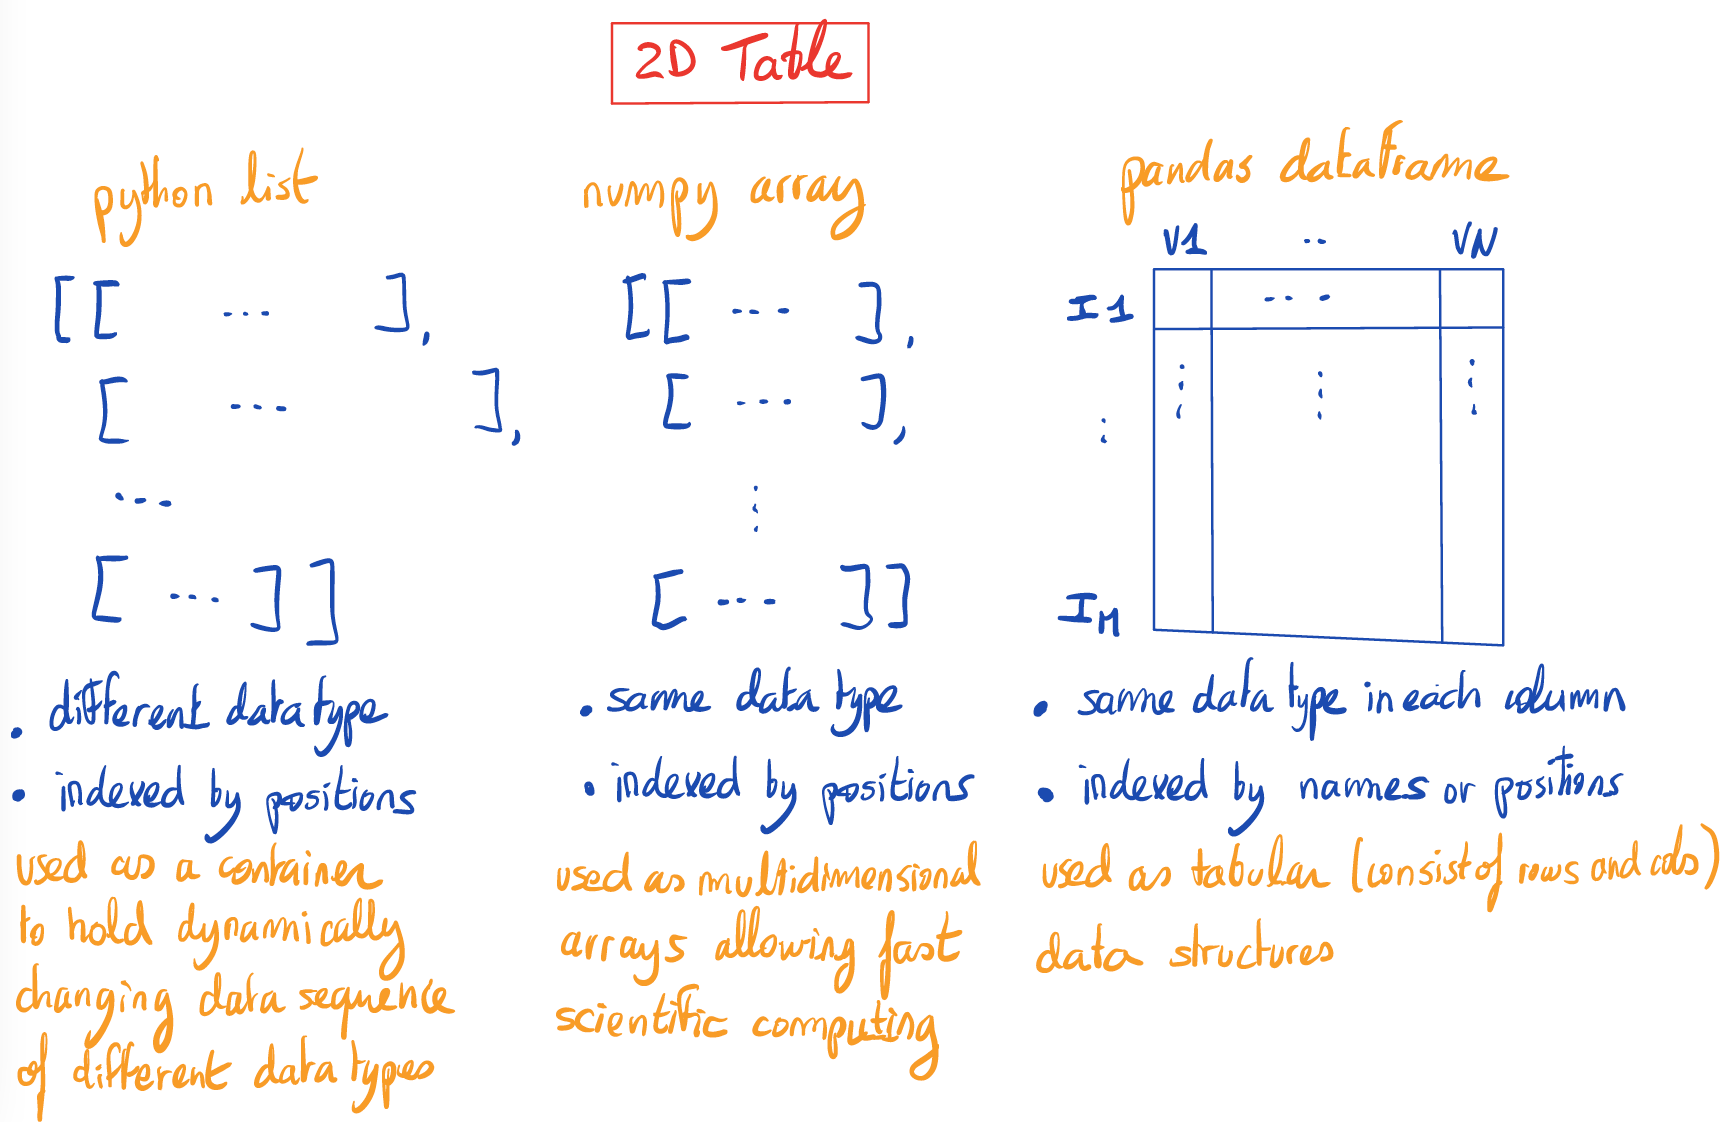

## 2. Data representation <a name="2"></a>

### Reading a dataframe

Reading an existing dataframe with the method `read_csv` (see documentation for more details).

In [ ]:
# we gave the file path, how the values are separated in the file and the column chosen for being the observations index
iris = pd.read_csv('data/Iris.csv', sep=',', index_col="Id")
iris

### Creating a dataframe

there are many ways for creating a dataframe from scratch:

1. specify the data (python list or numpy array), the index and the column
2. specify feature by feature (columns) thanks to a dictionary

In [ ]:
import numpy as np

df1 = pd.DataFrame(data = np.random.rand(6,4),
                   index = ["u", "v", "w", "x", "y", "z"], # if not specified, it will be 0, 1, .. 5
                   columns = ["a", "b", "c", "d"]) # if not specified, it will be 0, 1, .. 5
df1

In [ ]:
df2 = pd.DataFrame({'a' : 1.,                                                           # Single item
                    'b' : "same",                                                       # Single item
                    'c' : np.random.rand(5),                                            # Multiple item
                    'd' : pd.Categorical(["test", "train", "train", "train", "test"])}) # Multiple item
df2

Like dictionaries, it is possible to add a new column (e.g. `column_name`) with values `values`:
```
df[column_name] = values
```

In [ ]:
# let us add `e` to df1
df1['e'] = np.random.randint(0, 2, size=df1.shape[0])
df1

### Viewing a dataframe

Instead of viewing the table in whole, pandas provides different methods for sneaking at it.

In [ ]:
iris.head(n=3) # first 3 rows / observations of the table

In [ ]:
iris.tail(n=3) # last 3 rows / observations of the table

In [ ]:
iris.values[:3]  # values are in a numpy array (let us view only the first 3 rows)
# xem 3 dong dau duoi dang array, chua phan data ra duoi dang table

Concerning the tables information, dataframe object contains many useful attributes:

In [ ]:
# iris data

print(iris.index, end="\n\n")   # index of the table
print(iris.columns, end="\n\n") # columns of the table
print(iris.shape, end="\n\n")   # shape of the table
print(iris.dtypes, end="\n\n")  # data types of each variable

In [ ]:
# df1 data

print(df1.index, end="\n\n")   # index of the table
print(df1.columns, end="\n\n") # columns of the table
print(df1.shape, end="\n\n")   # shape of the table
# CHECK XEM DATA CO BAO NHIEU HANG VA COT
print(df1.dtypes, end="\n\n")  # data types of each variable
# quantitative/qualitative features
# because data in each col is same; so just show type of data in row

Or in a more compact way, the method:
- `info` gives **general information** concerning the dataframe and 
- `describe` gives **quantitative information** concerning the dataframe. 

In particular, info indicates the categorical variables (which are not treated by describe).

In [ ]:
iris.info()

In [ ]:
iris.describe()

One can also sort the rows indices according to its name or a column's values

In [ ]:
df1.sort_index(ascending=False)
# sort row

In [ ]:
df1.sort_values(by='a')
# sort value in a col

## 3. Data manipulation <a name="3"></a>

Let us consider the `iris` dataset as our toy dataset for this section. As a reminder:

In [ ]:
iris.head()

### Updating row and column label

it is possible to rename the row and column labels

- **columns**

The DataFrame object has the attribute `columns`. We can reassign it easily with a list.

In [ ]:
print(iris.columns)
iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
print(iris.columns)

- **rows**

For the row labels, the pandas DataFrame object offers many methods for updating it (see documentation with `help` command for more details about input arguments):
- `reset_index` which resets an index of a Data Frame. reset_index() method sets a list of integers ranging from 0 to length of data as an index;
- `set_index` which sets the DataFrame index (a.k.a row labels) using existing (one or more) columns;

and finally like columns, reassign the `index` attribute of the DataFrame object.

In [ ]:
iris.head(3)

In [ ]:
# you can reset index with:

iris.reset_index(inplace=True) # the Id is now a new column of the dataframe
iris.head(3)
# tao them cot id auto

In [ ]:
# you can reassign the "Id" columns as a Dataframe index:

iris.set_index("Id", drop=True, inplace=True)
iris.head(3)

In [ ]:
# RENAME INDEX (ROW)
# rk: alternatively we can use `reindex` which creates a new index and reindex the dataframe

iris.index = ["lab " + str(i) for i in range(len(iris))]
# Rename row
iris.head()

## in the same logic but more compact:
#iris.index = "lab " + iris.index.map(str)
#head(iris)

### Natural indexing

Like previous data structures (e.g. python lists or numpy arrays) natural indexing is performed with `[]`. This indexes the columns of "dataframes" and the rows of "series". 

Series is the data structure for a **single column of a `DataFrame`**: a DataFrame is actually stored in memory as a collection of Series.

In [ ]:
iris['SepalWidth'] # iris is a "DataFrame" and the result of this execution is a "Series"

In [ ]:
s = iris['SepalWidth'] # iris is a "DataFrame" and the result of this execution is a "Series"
s[2]
# cut data trong mot cot, vi tri duoc cat la value thu 2 trong col SepalWidth

You may want to extract several columns or several rows.

In [ ]:
iris[['SepalWidth', 'PetalLength']]

**Remark:** selecting with `[[]]` always return a dataframe.

In [ ]:
iris[['SepalWidth']]

### Label based indexing and slicing: method `.loc[]`

Label based indexing is an enhancement of natural indexing, accessible with `.loc[]`. Indexing has to be thought as a matrix but with labels instead of positions. Hence, the rows are indexed first (instead of the columns with `[]`).

In [ ]:
iris.loc["lab 3"]  # Single row
# cut row
# Label index count stop point, khong giong index for position

In [5]:
iris.loc[:, 'SepalWidth'].head()  # Single column
# cut col

NameError: name 'iris' is not defined

In [ ]:
iris.loc[['lab 3', 'lab 16']]  # Multiple rows

In [ ]:
iris.loc['lab 3':'lab 16']  # Row slicing

In [ ]:
iris.loc['lab 3':'lab 16':3]  # Row slicing (with step 3)

In [ ]:
iris.loc['lab 3':'lab 16':3, :'PetalWidth']  # Row and column slicing

### position based indexing and slicing: method `.iloc[]`

Interger location (or position) based indexing is done with `.iloc[]`. It is similar to `.loc[]` but considering only integer positions instead of labels.

**Remark:** endpoints are not included (similarly to numpy arrays).

In [ ]:
iris.iloc[:2]
# cut row

In [ ]:
iris.iloc[10:20:2, ::2]
# cut row and col

### Boolean indexing and slicing

Similarly to Numpy arrays, dataframes can be indexed with Boolean variables thanks to `.loc[]`.

In [ ]:
iris.loc[iris['PetalWidth'] > 2.3]  # Row selection

In [ ]:
iris.loc[iris['PetalWidth'] > 2.3, ["PetalWidth", "Species"]]  # Row and column selection

The `isin` method enables to do a selection through and existence condition:

In [ ]:
# we select only rows with "Iris-virginica" OR 'Iris-virginica' species

iris.loc[ iris['Species'].isin(['Iris-setosa', 'Iris-virginica']) ]

# select several specific data in row at the col

**Remark:** it is possible to do a random indexing with the method `sample`

In [ ]:
iris.sample(n=5) # 5 random sampling
# random index (row)

### Adding and deleting items

Let us consider a copy of the first 10 rows of `iris`.

In [ ]:
df = iris.iloc[:10].copy()
df

Adding a column:

In [ ]:
df['RandomNumbers'] = np.random.rand(10)
df

Adding a row:

In [ ]:
df.loc['duplicate last row'] = df.iloc[-1,:]
# -1 is last row
df

Deleting rows and colums

In [ ]:
df.drop('RandomNumbers', inplace=True, axis=1)
df.drop('duplicate last row', inplace=True, axis=0)
df

### Concatenating two dataframes

thanks to the function `concat` of pandas, it is easy to concatenate pandas objects along a particular axis.

**Remark:** as always (see lecture on scientific computing), `axis=0` is for index and `axis=1` is for columns

Let us concatenate `df` (a copy of the first 10 rows of `iris`) with the following dataframes:

In [ ]:
# new (very giant!) species
# GROUP BY ( SQL)
#  CREATE 1 Table like Dictionary
df_row = pd.DataFrame({
    'SepalLength': [10, 20, 30],
    'SepalWidth': [10, 20, 30],
    'PetalLength': [10, 20, 30],
    'PetalWidth': [10, 20, 30],
    'Species': ["Iris-giant", "Iris-giant", "Iris-giant"]
}, index=["new 1", "new 2", "new 3"])
df_row

In [ ]:
# new information: "Age" and "Country" of the iris

df_col = pd.DataFrame({
    'Age': np.random.randint(0, 10, 10),
    'Country': ["France", "Italy", "Spain", "China", "US", "France", "Spain", "Spain", "France", "Japan"]
}, index=df.index)
df_col
# index lay tu index cua df ( bang data of iris)

In [ ]:
# concatenate with axis=0

pd.concat((df, df_row), axis=0)
# nhap hang voi hang, df la row cua iris table

In [ ]:
# concatenate with axis=1 and assign it to the variable name `data`

data = pd.concat((df, df_col), axis=1)
data
# nhap cot cua hai bang df la data of iris table

In [ ]:
df.drop(["Species"], axis=1, inplace=True)
df

In [ ]:
df.median()  # Median of numeric columns
# alternatively: df.median(axis=0)

In [ ]:
df.median(axis=1)  # Median of rows (numeric objects only)

In [ ]:
df['SepalLength'].value_counts()
# group by ne hihi^^

In [ ]:
df.max(axis=0)
# max value cua tung col

## 5. Data visualization with Pandas <a name="5"></a>

A dataframe also comes with many methods for **data visualization** (see lecture 5). These methods are based on the package `matplotlib` and therefore the customization of lecture 5 can be applied here (see documentation for more details).

Here, we illustrate just a few of them:
- first on the dataset `iris`;
- then later (todo in Exercice 3) on the concatenated dataset `iris_plus` generated below.

In [ ]:
iris.head()

In [ ]:
# generate iris_plus

countries = ["France", "Italy", "Spain", "China", "US", "Japan"]
probabilities = [0.35, 0.2, 0.05, 0.1, 0.1, 0.2]

extension = pd.DataFrame({
    'Age': np.random.randint(0, 10, len(iris)),
    'Country': np.random.choice(countries, size=len(iris), replace=True, p=probabilities)
}, index=iris.index)

iris_plus = pd.concat((iris, extension), axis=1)
# axis=1 la dang add cho col
# iris_plus la new table after merging between iris and extension

In [ ]:
iris_plus.head()

### Line plot

In [ ]:
ax = iris.plot(figsize=(10, 6))  # Columns vs index
ax.set_title("Line plot w.r.t. species");

In [ ]:
iris.plot(subplots=True, figsize=(10, 8));  # Columns vs index

### Histogram

In [ ]:
ax = iris.plot.hist(alpha=0.5, figsize=(10, 6))
ax.set_title("Histogram");
ax.set_xlabel("in cm")

In [ ]:
iris.plot.hist(alpha=0.5, subplots=True, figsize=(10, 8));

### Scatter plot

In [ ]:
iris.plot.scatter(x="SepalLength", y="PetalLength");

# Exercices <a name="E"></a>

## Exercice 1:

- Import the dataset `defra_consumption` (you can first download it from my website). You should have the following first 5 rows:

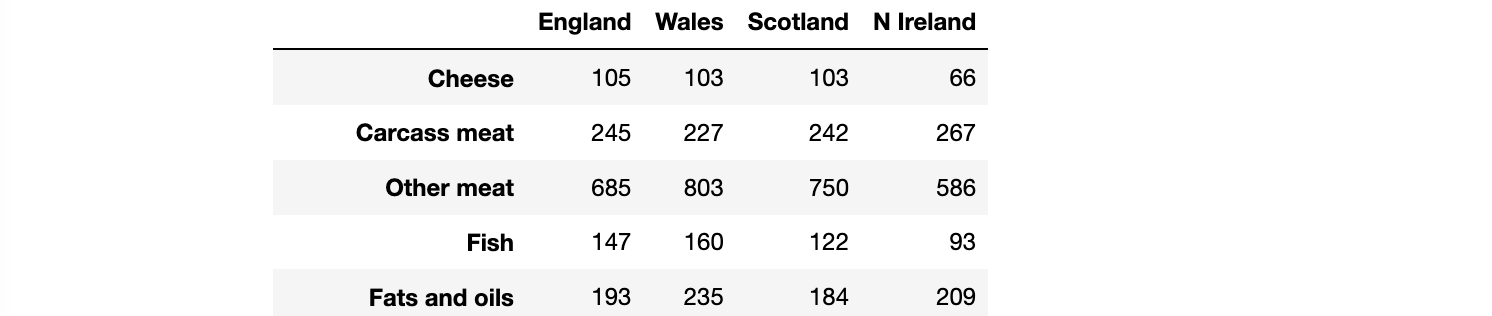


- How many rows/columns, quantitative/qualitative features do we have in this dataset ?

- Extract the following subtable:

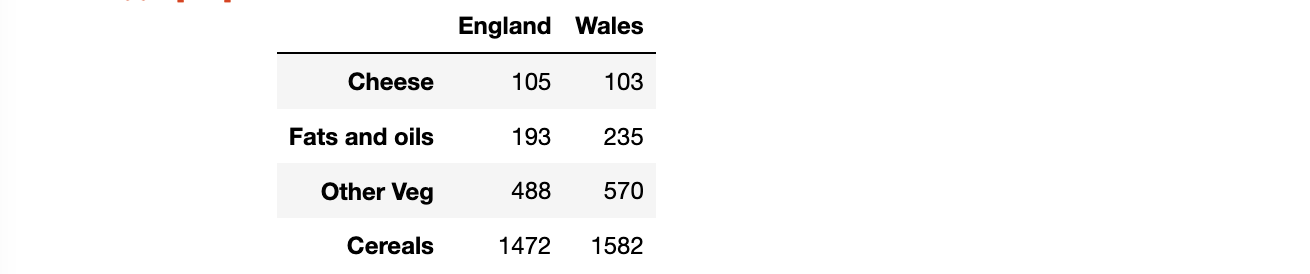

## Exercice 2:

With the dataset imported from exercice 1, generate the following figure:

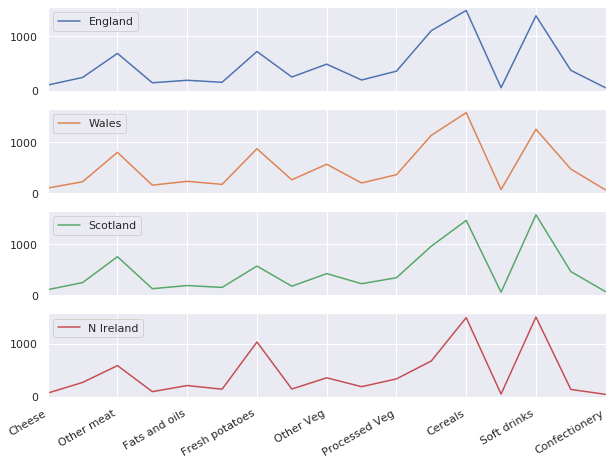

## Exercice 3: Additional plots

Thanks to the dataset `iris_plus` previously generated,

- Plot the following **horizontal bar chart**:

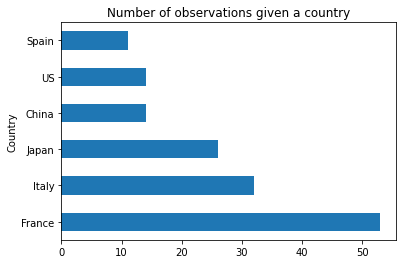

- Plot the following **pie chart** (you can use tools from matplotlib package):

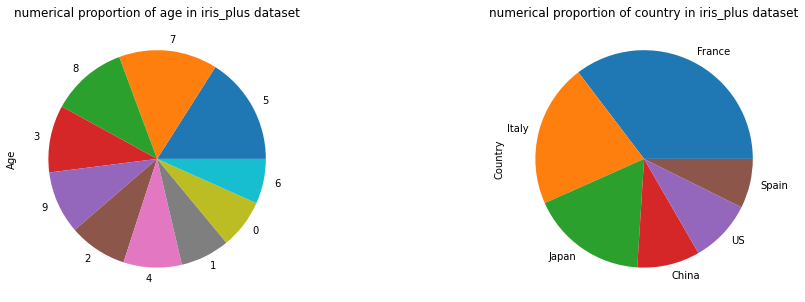

## Exercice 4:

From the dataset `iris` (or `iris_plus`), find out the average values of `SepalLength` and `SepalWidth` of all three species.